In [ ]:
1. 신생아 이름 데이터 분석

In [ ]:
-유명인(미국대통령) 이름으로 유행분석

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
pieces=[]
for year in range(1880,2011):
    path='names/names/yob%d.txt' % year
    df=pd.read_csv(path,names=['name','sex','births'])
    df['year']=year
    pieces.append(df)
    
pd.concat(pieces)     #     <-모든 pieces의 데이터들을 합침
pd.concat(pieces).shape

(1690784, 4)

In [465]:
names=pd.concat(pieces,ignore_index=True)
names.pivot_table('births',index='year',columns='sex',aggfunc=np.sum)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [7]:
president_name=['George Washington','John Adams,Thomas Jefferson',
                'James Madison','James Monroe','John Quincy Adams',
                'Andrew Jackson','Martin Van Buren',
                'William Henry Harrison','John Tyler','James K. Polk,Zachary Taylor',
                'Millard Fillmore','Franklin Pierce','James Buchanan',
                'Abraham Lincoln','Andrew Johnson','Ulysses S. Grant','Rutherford B. Hayes',
                'James A. Garfield','Chester A. Arthur','Grover Cleveland',
                'Benjamin Harrison','Grover Cleveland','William McKinley','Theodore Roosevelt',
                'William Howard Taft','Woodrow Wilson','Warren G. Harding',
                'Calvin Coolidge','Herbert Hoover','Franklin D. Roosevelt','Harry S. Truman',
                'Dwight D. Eisenhower','John F. Kennedy','Lyndon B. Johnson','Richard Nixon',
                'Gerald Ford','Jimmy Carter','Ronald Reagan','George H. W. Bush',
                'Bill Clinton','George W. Bush','Barack Obama','Donald Trump']

In [8]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [12]:
def get_top1000(group):
    return group.sort_index(by='births',ascending=False)[:1000]
grouped=names.groupby(['year','sex'])
top1000=grouped.apply(get_top1000)
top1000.reset_index(inplace=True,drop=True)

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


In [160]:
girls1000=top1000[top1000.sex=='F']
boys1000=top1000[top1000.sex=='M']

In [22]:
number_president=[]
for i in range(len(president_name)):
    number_president.append(i)
number_president
president_labeled=dict(zip(number_president,president_name))
president_labeled

{0: 'George Washington',
 1: 'John Adams,Thomas Jefferson',
 2: 'James Madison',
 3: 'James Monroe',
 4: 'John Quincy Adams',
 5: 'Andrew Jackson',
 6: 'Martin Van Buren',
 7: 'William Henry Harrison',
 8: 'John Tyler',
 9: 'James K. Polk,Zachary Taylor',
 10: 'Millard Fillmore',
 11: 'Franklin Pierce',
 12: 'James Buchanan',
 13: 'Abraham Lincoln',
 14: 'Andrew Johnson',
 15: 'Ulysses S. Grant',
 16: 'Rutherford B. Hayes',
 17: 'James A. Garfield',
 18: 'Chester A. Arthur',
 19: 'Grover Cleveland',
 20: 'Benjamin Harrison',
 21: 'Grover Cleveland',
 22: 'William McKinley',
 23: 'Theodore Roosevelt',
 24: 'William Howard Taft',
 25: 'Woodrow Wilson',
 26: 'Warren G. Harding',
 27: 'Calvin Coolidge',
 28: 'Herbert Hoover',
 29: 'Franklin D. Roosevelt',
 30: 'Harry S. Truman',
 31: 'Dwight D. Eisenhower',
 32: 'John F. Kennedy',
 33: 'Lyndon B. Johnson',
 34: 'Richard Nixon',
 35: 'Gerald Ford',
 36: 'Jimmy Carter',
 37: 'Ronald Reagan',
 38: 'George H. W. Bush',
 39: 'Bill Clinton',
 40

In [46]:
president_labeled[0].split()

['George', 'Washington']

In [89]:
president_name[0]

'George Washington'

In [90]:
president_name_values=president_labeled.values()
pnv_splited=[]
for i in range(len(president_name)):
    pnv_splited.append(president_name[i].split())

In [95]:
letter_name=[]
for i in range(len(pnv_splited)):
    for j in range(len(pnv_splited[i])):
        letter_name.append(pnv_splited[i][j])

In [66]:
boysname=boys1000['name']
boys1000name=boysname.values

In [109]:
'George' in president_labeled[0]

True

In [127]:
def presidentnametrend(letter):
    if letter in boys1000name:
        plt.plot(boys1000[boys1000.name==letter].year,
                 boys1000[boys1000.name==letter].births)

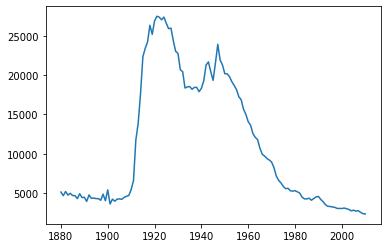

In [129]:
presidentnametrend('George')

In [126]:
for i in range(len(letter_name)):
    if letter_name[i] in boys1000name:
        print(letter_name[i],boys1000[boys1000.name==letter_name[i]].births.mean())

George 11021.900763358779
Washington 24.384615384615383
John 38475.71755725191
Jefferson 144.54198473282443
James 38547.53435114504
Madison 66.35135135135135
James 38547.53435114504
Monroe 149.29347826086956
John 38475.71755725191
Quincy 216.10752688172042
Adams 7.0
Andrew 9211.053435114503
Jackson 1107.6259541984732
Martin 2264.671755725191
Van 204.96610169491527
William 30431.954198473282
Henry 4687.526717557252
Harrison 409.23664122137404
John 38475.71755725191
Tyler 7613.295774647887
James 38547.53435114504
Taylor 798.7709923664122
Millard 172.80434782608697
Franklin 1000.0305343511451
Pierce 127.62820512820512
James 38547.53435114504
Abraham 555.0687022900763
Lincoln 163.68217054263565
Andrew 9211.053435114503
Johnson 39.29032258064516
Ulysses 119.48387096774194
Grant 804.3816793893129
Rutherford 6.75
Hayes 29.09090909090909
James 38547.53435114504
Garfield 58.605633802816904
Chester 1022.7931034482758
Arthur 3962.5190839694656
Grover 271.5578947368421
Cleveland 185.86238532110093

In [ ]:
-각 연도별 가장 인기 있는 이름을 분석

In [143]:
names[names['year']==2010].name.values[0]

'Isabella'

In [149]:
boys1000[boys1000['year']==2010].births.values[0]

21875

In [151]:
for i in range(1880,2011):
    print(boys1000[boys1000['year']==i].name.values[0],
          boys1000[boys1000['year']==i].births.values[0],i)

John 9655 1880
John 8769 1881
John 9557 1882
John 8894 1883
John 9387 1884
John 8756 1885
John 9026 1886
John 8109 1887
John 9248 1888
John 8548 1889
John 8502 1890
John 7681 1891
John 9039 1892
John 8049 1893
John 8238 1894
John 8321 1895
John 8139 1896
John 7550 1897
John 8160 1898
John 6990 1899
John 9834 1900
John 6899 1901
John 7908 1902
John 7609 1903
John 8108 1904
John 8059 1905
John 8263 1906
John 8983 1907
John 9342 1908
John 9591 1909
John 11451 1910
John 13445 1911
John 24586 1912
John 29318 1913
John 37942 1914
John 47579 1915
John 50046 1916
John 51853 1917
John 56562 1918
John 53528 1919
John 56911 1920
John 58227 1921
John 57276 1922
John 57469 1923
Robert 60804 1924
Robert 60885 1925
Robert 61124 1926
Robert 61638 1927
Robert 60649 1928
Robert 59798 1929
Robert 62108 1930
Robert 60492 1931
Robert 59224 1932
Robert 54168 1933
Robert 55811 1934
Robert 56501 1935
Robert 58462 1936
Robert 61799 1937
Robert 62246 1938
Robert 59623 1939
James 62454 1940
James 66696 1941
Jame

In [153]:
for i in range(1880,2011):
    print(girls1000[girls1000['year']==i].name.values[0],
          girls1000[girls1000['year']==i].births.values[0],i)

Mary 7065 1880
Mary 6919 1881
Mary 8149 1882
Mary 8012 1883
Mary 9217 1884
Mary 9128 1885
Mary 9891 1886
Mary 9888 1887
Mary 11754 1888
Mary 11649 1889
Mary 12078 1890
Mary 11704 1891
Mary 13174 1892
Mary 12784 1893
Mary 13151 1894
Mary 13446 1895
Mary 13811 1896
Mary 13412 1897
Mary 14406 1898
Mary 13172 1899
Mary 16710 1900
Mary 13137 1901
Mary 14485 1902
Mary 14275 1903
Mary 14962 1904
Mary 16067 1905
Mary 16371 1906
Mary 17579 1907
Mary 18664 1908
Mary 19256 1909
Mary 22840 1910
Mary 24385 1911
Mary 32295 1912
Mary 36631 1913
Mary 45341 1914
Mary 58184 1915
Mary 61428 1916
Mary 64270 1917
Mary 67375 1918
Mary 65839 1919
Mary 70974 1920
Mary 73980 1921
Mary 72156 1922
Mary 71636 1923
Mary 73505 1924
Mary 70594 1925
Mary 67830 1926
Mary 70594 1927
Mary 66867 1928
Mary 63502 1929
Mary 64110 1930
Mary 60303 1931
Mary 59859 1932
Mary 55477 1933
Mary 56898 1934
Mary 55055 1935
Mary 54356 1936
Mary 55635 1937
Mary 56199 1938
Mary 54903 1939
Mary 56203 1940
Mary 58025 1941
Mary 63236 1942


In [ ]:
-john,sophia,michael,daniel,carter 순위조사

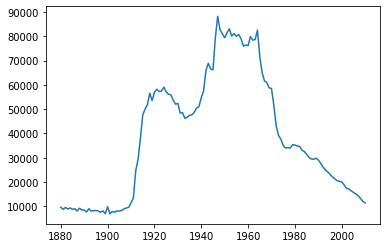

In [163]:
plt.plot(boys1000[boys1000['name']=='John'].year,boys1000[boys1000['name']=='John'].births)

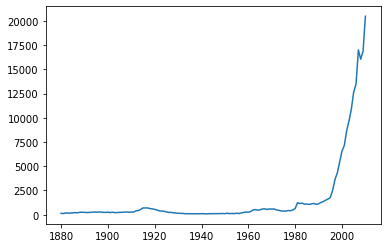

In [165]:
plt.plot(girls1000[girls1000['name']=='Sophia'].year,girls1000[girls1000['name']=='Sophia'].births)

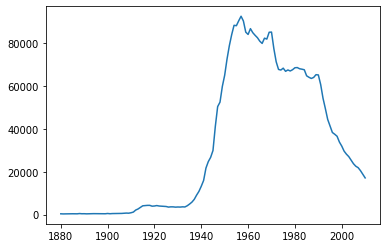

In [166]:
plt.plot(boys1000[boys1000['name']=='Michael'].year,boys1000[boys1000['name']=='Michael'].births)

In [167]:
boys1000[boys1000['name']=='John'].births

942        9655
2880       8769
4877       9557
6877       8894
8877       9387
          ...  
252895    15140
254895    14405
256896    13273
258903    12048
260902    11424
Name: births, Length: 131, dtype: int64

In [ ]:
lux2 = dict(zip(check_order, [490, 334, 550, 18.72]))    # zip 함수로


In [185]:
check_order=['John','Sophia','Michael','Daniel','Carter']
John_births=list(boys1000[boys1000['name']=='John'].births)
Sophia_births=list(girls1000[girls1000['name']=='Sophia'].births)
Michael_births=list(boys1000[boys1000['name']=='Michael'].births)
Daniel_births=list(boys1000[boys1000['name']=='Daniel'].births)
Carter_births=list(boys1000[boys1000['name']=='Carter'].births)

In [189]:
total_births=top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


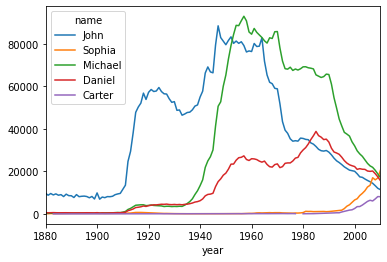

In [323]:
subset=total_births[['John','Sophia','Michael','Daniel','Carter']]
subset.plot()

In [428]:
names_listdic=['John', 'Sophia', 'Michael', 'Daniel', 'Carter']
def nameofyear(year):
    subset_values=list(df_subset[year-1880:year-1880+1].values[0])
    names_listdic=['John', 'Sophia', 'Michael', 'Daniel', 'Carter']
    for i in range(5):
        M=max(subset_values)
        maxindex=subset_values.index(M)
        print(names_listdic[maxindex],M)
        subset_values.remove(M)
        del names_listdic[maxindex]
        

In [429]:
nameofyear(1883)

John 8934.0
Daniel 615.0
Michael 307.0
Sophia 159.0
Carter 11.0


In [ ]:
- 연도별 성별 가장 많이 나온 이름의 자음 모음 비율

In [475]:
def add_prop(group):
    births=group.births.sum()
    group['prop']=group.births/births
    return group

In [467]:
names1880=names[names['year']==1880]

In [471]:
girls1880=names1880[names1880['sex']=='F']
boys1880=names1880[names1880['sex']=='M']

In [480]:
girls1880['prop']=girls1880.births/girls1880.births.sum()

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [484]:
girls1880_sorted=girls1880.sort_index(by='prop',ascending=False)
girls1880_cumsum=girls1880_sorted.sort_values(by='prop',ascending=False).prop.cumsum()

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [487]:
girls1880_cumsum.values.searchsorted(0.5)+1

38

In [499]:
girls1880_list=list(halfname_girls1880.values)

In [496]:
collection=['a','e','i','o','u']
halfname_girls1880=girls1880_sorted[0:38]['name']

for i in range(len(girls1880_list)):
    


0          Mary
1          Anna
2          Emma
3     Elizabeth
4        Minnie
5      Margaret
6           Ida
7         Alice
8        Bertha
9         Sarah
10        Annie
11        Clara
12         Ella
13     Florence
14         Cora
15       Martha
16        Laura
17       Nellie
18        Grace
19       Carrie
20        Maude
21        Mabel
22       Bessie
23       Jennie
24     Gertrude
25        Julia
26       Hattie
27        Edith
28       Mattie
29         Rose
30    Catherine
31      Lillian
32          Ada
33       Lillie
34        Helen
35       Jessie
36       Louise
37        Ethel
Name: name, dtype: object

In [ ]:
prop_cumsum=df.sort_values(by='prop',ascending = False).prop.cumsum()
prop_cumsum[:10]
prop_cumsum.values.searchsorted(0.5)